# Maps

In [10]:


from useful_scit.imps import *
from out_grid_funs import *
from matplotlib.patches import Polygon

In [2]:
path = '/Users/diego/Downloads/wrf_out_sample/'

In [3]:
files = os.path.join(path,'wrf*')
files = glob.glob(files)
files

[]

In [4]:
files_dic = get_files(path)

In [5]:
files_dic['ll']=files_dic.apply(lambda r: get_ll(r.path), axis=1 )

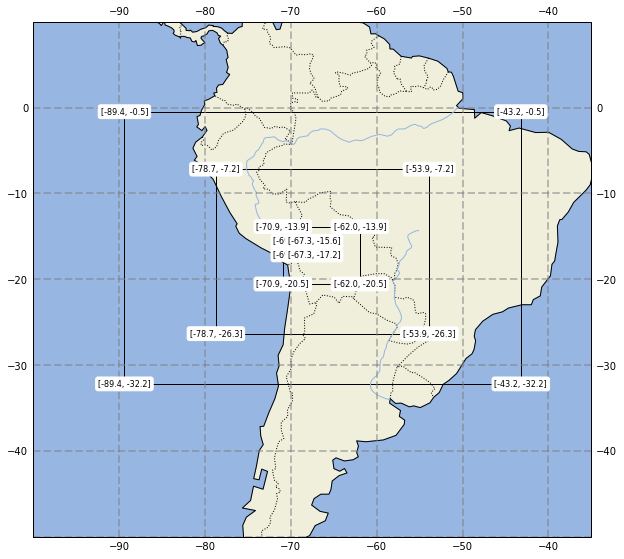

In [7]:
ax,proj = get_map(-100,-35,-50,10,pargs={'figsize':(10,10)})
for l,r in files_dic.iterrows():
    ll = r.ll
    plot_pol(r.ll,ax)
    add_text_ll(ll,ax)
ax.set_xlim(-100,-35)
ax.set_ylim(-50,10);

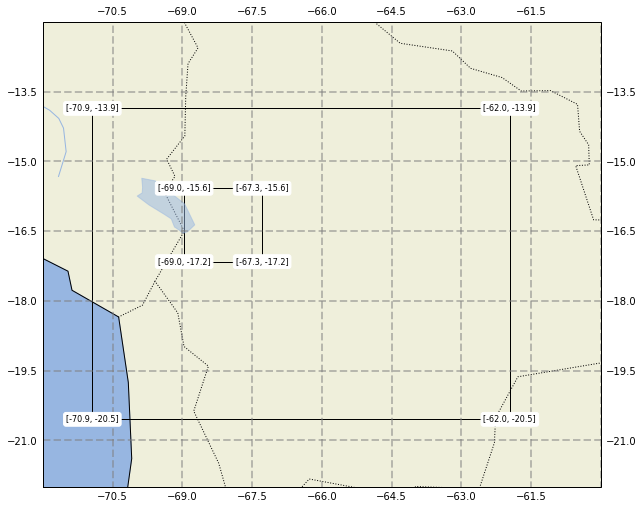

In [8]:
ax,proj = get_map(-100,-35,-50,10,pargs={'figsize':(10,10)})
for l,r in files_dic[-2:].iterrows():
    ll = r.ll
    plot_pol(r.ll,ax)
    add_text_ll(ll,ax)
ax.set_xlim(-72,-60)
ax.set_ylim(-22,-12);

In [62]:
for r,v in files_dic.iterrows():
    print(pd.DataFrame(v['ll'],[r]).T.round(7))

            d1
loM -43.211700
lom -89.388306
laM  -0.481514
lam -32.188271
            d2
loM -53.867840
lom -78.732163
laM  -7.172142
lam -26.339253
            d3
loM -61.958614
lom -70.937401
laM -13.861786
lam -20.549194
            d4
loM -67.286682
lom -68.964035
laM -15.579453
lam -17.157211


# Tables

In [2]:
add_hoc_dic = {
'd1':
{
    'loM': -43.211700,
    'lom': -89.388306,
    'laM':  -0.481514,
    'lam': -32.188271,},
'd2':
{
    'loM': -53.867840,
    'lom': -78.732163,
    'laM':  -7.172142,
    'lam': -26.339253,},
'd3':
{
    'loM': -61.958614,
    'lom': -70.937401,
    'laM': -13.861786,
    'lam': -20.549194,},
'd4':
{
    'loM': -67.286682,
    'lom': -68.964035,
    'laM': -15.579453,
    'lam': -17.157211,}
              }

In [5]:
import pandas as pd
ahdf = pd.DataFrame(add_hoc_dic).T

In [9]:
def _c(r,a,b): return (r[a] + r[b]) / 2 
for ll in ['lo','la']:
    ahdf[f'{ll}C']=ahdf.apply(_c,axis=1,args=[f'{ll}M',f'{ll}m'])
ahdf

,loM,lom,laM,lam,loC,laC
d1,-43.211700,-89.388306,-0.481514,-32.188271,-66.300003,-16.334892
d2,-53.867840,-78.732163,-7.172142,-26.339253,-66.300002,-16.755698
d3,-61.958614,-70.937401,-13.861786,-20.549194,-66.448007,-17.205490
d4,-67.286682,-68.964035,-15.579453,-17.157211,-68.125359,-16.368332


In [28]:
file = files[0]

In [31]:
xa = xr.open_dataset(file)

In [36]:
df = xa.XLONG_U[0,0].to_pandas()

In [56]:
def fun(x):
    global xx
    xx=x
    return x[-1] - x[0]
res = df.rolling(2).apply(lambda x: fun(x), raw=True)

In [61]:
res.value_counts()

0.394669    49
0.394672    36
0.394676    32
dtype: int64

In [53]:
xx[0]

5e-324